# **Decision Tree**

# the random forest Consists of many Decision Trees

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("/kaggle/input/salaries-of-companies/salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
inputs = df.drop(columns=["salary_more_then_100k"])
target = df["salary_more_then_100k"]

In [4]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree =LabelEncoder()

In [5]:
inputs["company_n"] = le_company.fit_transform(inputs["company"])
inputs["job_n"] = le_job.fit_transform(inputs["job"])
inputs["degree_n"] = le_degree.fit_transform(inputs["degree"])

In [6]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [7]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [8]:
model = tree.DecisionTreeClassifier()

In [9]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [10]:
model.score(inputs_n, target)

1.0

In [11]:
model.predict([[0,1,1]])

array([0])

In [12]:
model.feature_importances_

array([0.4       , 0.33333333, 0.26666667])

# **Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 640x480 with 0 Axes>

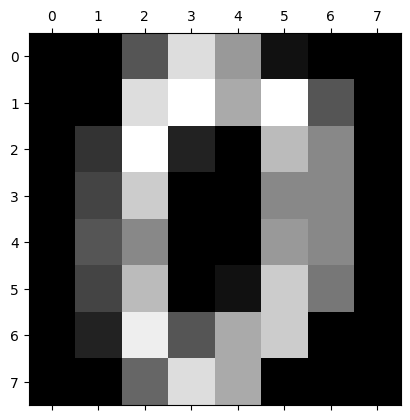

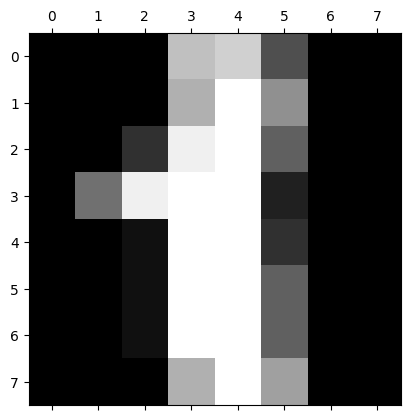

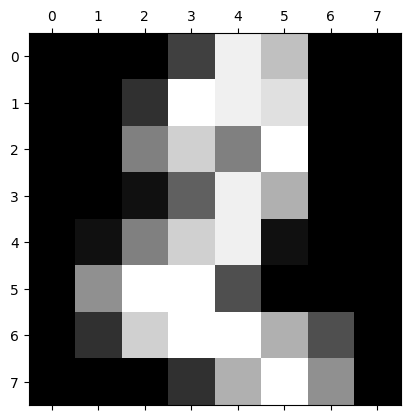

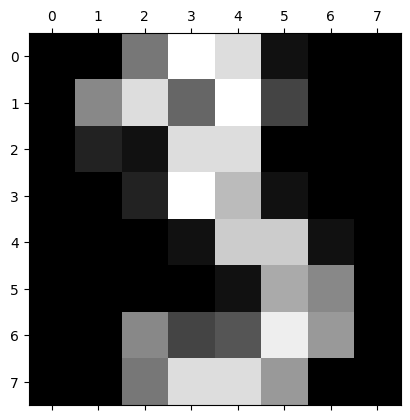

In [14]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [15]:
df1 = pd.DataFrame(digits.data)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
df1['target'] = digits.target # target

In [17]:
X = df1.drop('target',axis='columns')
y = df1.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
model = RandomForestClassifier(n_estimators=100) # the number of decision trees 
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
model.score(X_train, y_train)

1.0

In [21]:
model.score(X_test, y_test)

0.9805555555555555

In [22]:
y_predicted = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]])

Text(95.72222222222221, 0.5, 'Truth')

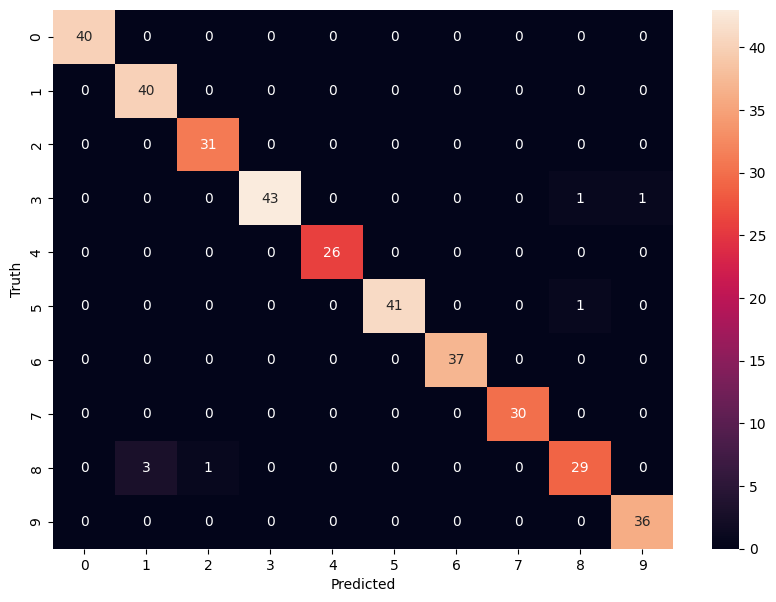

In [24]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')